In [175]:
# look at the TTS of various segments 
# date created: 3/3/2020
# author: sofia chelpon

In [1]:
############ --------------- PREP WORKSPACE --------------- ###########
import numpy as np 
import pandas as pd
import xarray as xr 

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
%config inlinebackend.figure_format='retina'

# import my TTS module, need to add path to folder
import sys
sys.path.insert(1, '/Volumes/scdrive2/TTS_2020/base_tts_code/')
import tts_mod

In [2]:
############ --------------- LOAD SEGMENT DATA --------------- ###########
utbl_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/utbl_allseg_campavgbl_tropotau_twp.pkl')
mustar_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/mustar_allseg_campavgbl_tropotau_twp.pkl')
tau_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/tau_allseg_campavgbl_tropotau_twp.pkl')
t_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/t_allseg_campavgbl_tropotau_twp.pkl')
gf_allseg = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/gf_allseg_campavgbl_tropotau_twp.pkl')
seg_info = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/segment_info_campavgbl_tropotau_twp.pkl')
trcnames_allseg = pd.read_pickle("/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/MD2_outputs/campavgbl_twp_tropotau/trcnames_allseg_twp_tropotau.pkl")

In [3]:
############ --------------- FILTER BY R^2 VALUES --------------- ###########
high_r2_idx = np.ndarray.flatten(np.argwhere(seg_info['r squared'].values >= 0.65))

seg_info_screened = seg_info.iloc[high_r2_idx]

# screen vars 
mustar_allseg_screened = mustar_allseg[high_r2_idx]
utbl_allseg_screened = utbl_allseg[high_r2_idx]
tau_allseg_screened = tau_allseg[high_r2_idx]
trcnames_allseg_screened = trcnames_allseg[high_r2_idx]

gf_allseg_screened = gf_allseg[high_r2_idx]
t_allseg_screened = t_allseg[high_r2_idx]

In [4]:
############ --------------- FIND MIN/MAX CURVES --------------- ###########
min_mode_loc = np.argmin(seg_info_screened['mode age']) 
max_mode_loc = np.argmax(seg_info_screened['mode age']) 

min_mean_age = np.min(seg_info_screened['mean age']) 
max_mean_age = np.max(seg_info_screened['mean age']) 
print(min_mean_age, max_mean_age)

min_mode_age = np.min(seg_info_screened['mode age']) 
max_mode_age = np.max(seg_info_screened['mode age']) 
print(min_mode_age, max_mode_age)

# utbl  
min_utbl = utbl_allseg_screened[min_mode_loc].values
max_utbl = utbl_allseg_screened[max_mode_loc].values

min_r2 = np.min(seg_info_screened['r squared']) 
max_r2 = np.max(seg_info_screened['r squared']) 

min_mustar = mustar_allseg_screened[min_mode_loc].values
max_mustar = mustar_allseg_screened[max_mode_loc].values

min_tau = tau_allseg_screened[min_mode_loc].values
max_tau = tau_allseg_screened[max_mode_loc].values

min_gf = gf_allseg_screened[min_mode_loc].values
max_gf = gf_allseg_screened[max_mode_loc].values

min_t = t_allseg_screened[min_mode_loc].values
max_t = t_allseg_screened[max_mode_loc].values

print(seg_info_screened['mode age'].mean())
print(seg_info_screened['mean age'].mean())

2.8859597271574606 42.57544581618625
0.8659196166970368 11.115919616697036
4.135901915873516
15.67809084270662


In [5]:
# look at the top 10, bottom 10 TTS sorted my mode 
ascend_mode = seg_info_screened.sort_values('mode age')
short10 = ascend_mode[:10]
long10 = ascend_mode[-10:]

In [6]:
# get positions 
pos = pd.read_pickle('/Volumes/scdrive2/TTS_2020/get_tts/tts_vary_ut/data_prep/awas_positions.pkl')
pos = pos.drop('Notes', axis = 0).drop('Intrument', axis = 0)
pos_time = pos.iloc[0]
pos

,13,14,15,16,17,18,19,20,21,22,...,500,508,509,510,511,512,513,514,515,516
Time_UTC,2014-01-22 01:44:00,2014-01-22 01:55:15,2014-01-22 02:06:30,2014-01-22 02:17:45,2014-01-22 02:29:00,2014-01-22 02:37:56,2014-01-22 02:42:44,2014-01-22 02:53:59,2014-01-22 03:33:52,2014-01-22 03:48:51,...,2014-02-19 22:26:57,2014-02-22 00:37:11,2014-02-22 00:47:12,2014-02-22 00:57:11,2014-02-22 01:07:12,2014-02-22 01:15:43,2014-02-22 01:24:44,2014-02-22 01:33:43,2014-02-22 01:42:44,2014-02-22 01:51:44
Flight,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,RF05,...,RF13,RF14,RF14,RF14,RF14,RF14,RF14,RF14,RF14,RF14
GGALT,12926,12923.6,12921.9,12916.4,12914.6,13117.4,13216.8,13206.7,12583.3,12269.2,...,12181.9,13199.4,13195.1,13187.5,13189.9,13183.7,13193.9,13191.8,13191.4,13186.5
GGLAT,12.9142,14.3045,15.7397,17.1915,18.0103,18.0206,18.0233,18.0213,18.4552,18.4043,...,13.0018,10.1888,8.99355,7.77513,6.5507,5.49736,4.38237,3.28746,2.18603,1.09351
GGLON,149.354,149.771,150,150,149.25,148.102,147.489,146.06,140.831,142.302,...,158.339,145.234,145.348,145.457,145.565,145.63,145.757,145.854,145.95,146.046


In [7]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
fill = np.empty(10)
fill[:] = np.nan

short10['GGALT'] = fill 
short10['GGLAT'] = fill 
short10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(short10))):
    seg = short10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    short10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    short10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    short10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
short10 = short10.reset_index()
short10 = short10.drop(short10.columns[0], axis=1)
short10

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-01-29 00:53:09,RF07,0.796443,3.194983,0.86592,12562.297852,8.384974,149.758392
1,2014-01-29 00:49:20,RF07,0.746823,3.016663,0.86592,13160.794922,8.722885,149.440445
2,2014-01-29 00:38:42,RF07,0.692071,2.885960,0.86592,13247.198242,9.663129,148.551682
3,2014-01-25 01:14:11,RF06,0.673630,2.953748,0.86592,13117.845703,23.502924,148.360748
4,2014-01-25 01:06:11,RF06,0.734984,3.960607,1.11592,13143.195312,22.456902,148.032532
5,2014-01-29 03:49:44,RF07,0.806731,4.030372,1.11592,13021.497070,1.121225,147.631851
6,2014-01-29 04:04:41,RF07,0.720296,6.018112,1.61592,13922.432617,3.099352,147.177567
7,2014-01-22 04:33:40,RF05,0.743628,6.247165,1.61592,12279.331055,18.085150,148.329468
8,2014-01-29 03:53:02,RF07,0.837986,7.052242,1.86592,13824.146484,1.552756,147.559814
9,2014-02-19 19:54:49,RF13,0.802119,7.321794,1.86592,13235.946289,9.848100,160.289154


In [10]:
# add lat/lon to the top and bottom 10 dataframes 
# create columns 
long10['GGALT'] = fill 
long10['GGLAT'] = fill 
long10['GGLON'] = fill 

# loop through every segment, match the time to the position and add it 
for idx in (np.arange(0, len(long10))):
    seg = long10.iloc[idx]
    time = seg.Time_UTC
    where = np.argwhere(pos_time.values == time)
    info = pos.iloc[:,[np.ndarray.item(where)]]
    long10['GGALT'].iloc[idx] = np.ndarray.item(info.iloc[2].values)
    long10['GGLAT'].iloc[idx] = np.ndarray.item(info.iloc[3].values)
    long10['GGLON'].iloc[idx] = np.ndarray.item(info.iloc[4].values)
    
long10 = long10.reset_index()
long10 = long10.drop(long10.columns[0], axis=1)
long10

/Users/schelpon/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Time_UTC,Flight,r squared,mean age,mode age,GGALT,GGLAT,GGLON
0,2014-02-19 18:24:47,RF13,0.922465,25.545267,6.86592,13227.262695,12.035303,154.724976
1,2014-02-17 04:04:13,RF12,0.931449,26.125842,6.86592,13299.714844,7.603748,146.001892
2,2014-02-17 04:02:17,RF12,0.866914,25.545267,6.86592,12907.899414,7.363147,146.094742
3,2014-02-22 01:42:44,RF14,0.931864,27.369929,7.11592,13191.357422,2.186029,145.950424
4,2014-02-19 18:48:47,RF13,0.917716,27.369929,7.11592,13231.445312,12.010446,157.753342
5,2014-02-22 00:37:11,RF14,0.933123,28.037489,7.36592,13199.353516,10.188820,145.233810
6,2014-02-17 04:05:43,RF12,0.920295,28.738426,7.61592,13634.990234,7.788882,145.930389
7,2014-02-22 01:24:44,RF14,0.927163,31.931584,8.36592,13193.916992,4.382374,145.757187
8,2014-02-13 05:57:37,RF11,0.877057,41.054894,10.86592,13187.341797,13.685620,145.938644
9,2014-02-13 05:26:12,RF11,0.854400,42.575446,11.11592,13601.328125,11.829076,142.401184


In [13]:
# plot prep 
mypath = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp.nc'
toga_trc = xr.open_dataset(mypath)

(0, 25)

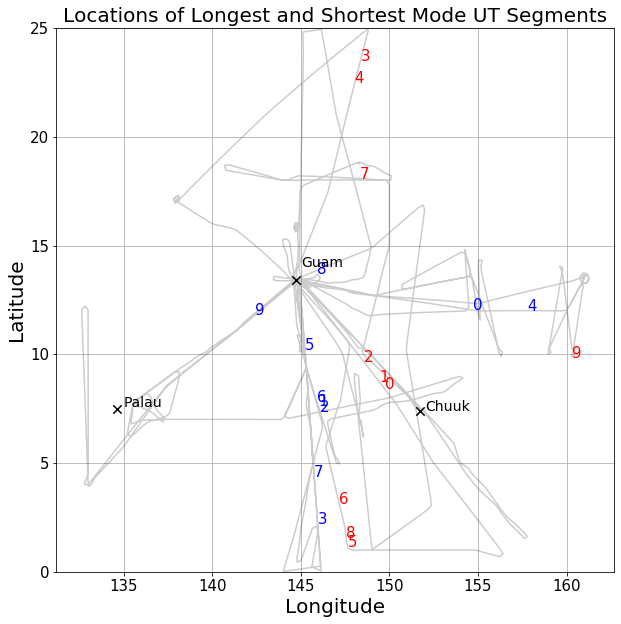

In [14]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.scatter(long10.GGLON, long10.GGLAT, color = 'b', alpha = 0)
ax.scatter(short10.GGLON, short10.GGLAT, color = 'r', alpha = 0)

for i in np.arange(0, len(long10)):
    plt.text(long10.GGLON[i], long10.GGLAT[i], str(i), fontsize = 15, color = 'b')
    plt.text(short10.GGLON[i], short10.GGLAT[i], str(i), fontsize = 15, color = 'r')

ax.grid(which = 'major')
ax.set_title('Locations of Longest and Shortest Mode UT Segments', fontsize = 20)
ax.set_xlabel('Longitude', fontsize = 20)
ax.set_ylabel('Latitude', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# landmarks
# guam 
plt.scatter(144.7, 13.4, s = 70, marker = 'x', color = 'k')
plt.text(145, 14, 'Guam', fontsize = 14)
# chuuk 
plt.scatter(151.7, 7.4, s = 70, marker = 'x', color = 'k')
plt.text(152, 7.4, 'Chuuk', fontsize = 14)
# palau 
plt.scatter(134.6, 7.5, s = 70, marker = 'x', color = 'k')
plt.text(135, 7.6, 'Palau', fontsize = 14)

# 
plt.plot(toga_trc.GGLON, toga_trc.GGLAT, color = 'k', alpha = 0.2)
plt.ylim([0, 25])